# Homework 8

**Harvard University**<br>
**Spring 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Friday, March 30th, 2018 at 11:00am

**Instructions:**

- Upload your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.




## Problem 1: Understanding Yelp Review Data As a Human
In this course, we've spent a lot of time learning algorithms for performing inference on complex models and we've spent time using these models to make decisions regarding our data. But in nearly every assignment, the model for the data is specified in the problem statement. In real life, the creative and, arguably, much more difficult task is to start with a broadly defined goal and then to customize or create a model which will meet this goal in some way. 



Problem #1 is atypical in that it does not involve any programming or (necessarily) difficult mathematics/statistics. The process of answering these questions *seriously* will however give you an idea of how one might create or select a model for a particular application and your answers will help you with formalizing the model if and when you're called upon to do so.

***Grading:*** *We want you to make a genuine effort to mold an ambiguous and broad real-life question into a concrete data science or machine learning problem without the pressure of getting the "right answer". As such, we will grade your answer of Problem #1 on a pass/fail basis. Any reasonable answer that demonstrates actual effort will be given a full grade.*

We've compiled for you a fairly representative selection of [Yelp reviews](./yelp_reviews.zip) for a (now closed) sushi restaurant called Ino's Sushi in San Francisco. Read the reviews and form an opinion regarding the various qualities of Ino's Sushi. Answer the following:

1. If the task is to summarize the quality of a restaurant in a simple and intuitive way, what might be problematic with simply classifying this restaurant as simply "good" or "bad"? Justify your answers with specific examples from the dataset.

2. For Ino's Sushi, categorize the food and the service, separately, as "good" or "bad" based on all the reviews in the dataset. Be as systematic as you can when you do this.

  (**Hint:** Begin by summarizing each review. For each review, summarize the reviewer's opinion on two aspects of the restaurant: food and service. That is, generate a classification ("good" or "bad") for each aspect based on what the reviewer writes.) 
  
3. Identify statistical weaknesses in breaking each review down into an opinion on the food and an opinion on the service. That is, identify types of reviews that make your method of summarizing the reviewer's optinion on the quality of food and service problemmatic, if not impossible. Use examples from your dataset to support your argument. 

4. Identify all the ways in which the task in #2 might be difficult for a machine to accomplish. That is, break down the classification task into simple self-contained subtasks and identify how each subtask can be accomplished by a machine (i.e. which area of machine learning, e.g. topic modeling, sentiment analysis etc, addressess this type of task).

5. Describe a complete pipeline for processing and transforming the data to obtain a classification for both food and service for each review.

### Part 1

It is difficult to decide what is "good" and what is "bad." For examples, the customers at Ino had conflicting opinions about the qualities of the food and service. Review01 said that the food and service were bad while review05 said both food and service were good. The reviews on Ino were all on opposite ends of the spectrum. What is good to some customers may be bad to other customers. As there is no concreteness in good or bad, it is problematic to simply classify the restaurants as "good" or "bad."

### Part 2

|Reviews|Food|Service|
|-------|----|-------|
|1|bad|bad|
|2|good|bad|
|3|bad|bad|
|4|good|bad|
|5|good|good|
|6|good|bad|
|7|good|good|
|8|good|good|
|9|N/A|bad|
|10|good|good|

## Problem 2: My Sister-In-Law's Baby Cousin Tracy ...


Wikipedia describes the National Annenberg Election Survey as follows -- "National Annenberg Election Survey (NAES) is the largest academic public opinion survey conducted during the American presidential elections. It is conducted by the Annenberg Public Policy Center at the University of Pennsylvania."  In the file [survey.csv](./survey.csv) we provide the following data from the 2004 National Annenberg Election Survey:  `age` -- the age of the respondents, `numr` -- the number of responses, and `knowlgbtq` -- the number of people at the given age who have at least one LGBTQ acquaintance.  We want you to model how age influences likelihood of interaction with members of the LGBTQ community in three ways. 

__Answer__: Please note, for part 1 I created two bayesian regression models (one using a binomial with a logit link and the other a standard linear regression). I created both because I wanted to see if a binomial was a better fit or if it would account for the changes in variance - but I realized the binomial compares the number of responses, not the likelihood (which is what it's asking for and which I already implemented for 2b). If I were to redo this, the beta would likely be better because that's a distribution of probabilities. When grading, please look at the second model (the straight line).

1). Using pymc3, create a bayesian regression model (either construct the model directly or use the glm module) with the same feature and dependent variable. Plot the mean predictions for ages 0-100, with a 2-sigma envelope.

In [1]:
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import scipy.stats as st
from theano import shared

C:\Users\Eddie\Anaconda2\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df = pd.read_csv('survey.csv')
x = df['age'].values
y = (df['knowlgbtq']/df['numr']).values
numr = df['numr'].values
knowlgbtq = df['knowlgbtq'].values

x = x.astype(np.int32)
numr = numr.astype(np.int32)
knowlgbtq = knowlgbtq.astype(np.int32)

x_shared = shared(x)
numr_shared = shared(numr)

data = dict(x=x, y=y)
#xrange = list(df['age'])
x_pred = np.array(range(101))

In [3]:
with pm.Model() as linreg: # model specifications in PyMC3 are wrapped in a with-statement

    pm.glm.GLM.from_formula('y ~ x', data)

In [4]:
with linreg:
    # obtain starting values via MAP
    start = pm.find_MAP(model=linreg)
    # instantiate sampler
    step = pm.Metropolis()
    trace_linreg = pm.sample(50000, step=step, start=start)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
logp = 65.762, ||grad|| = 4,903.9: 100%|█████| 39/39 [00:00<00:00, 1383.26it/s]
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sd_log__]
>Metropolis: [x]
>Metropolis: [Intercept]
The number of effective samples is smaller than 10% for some parameters.


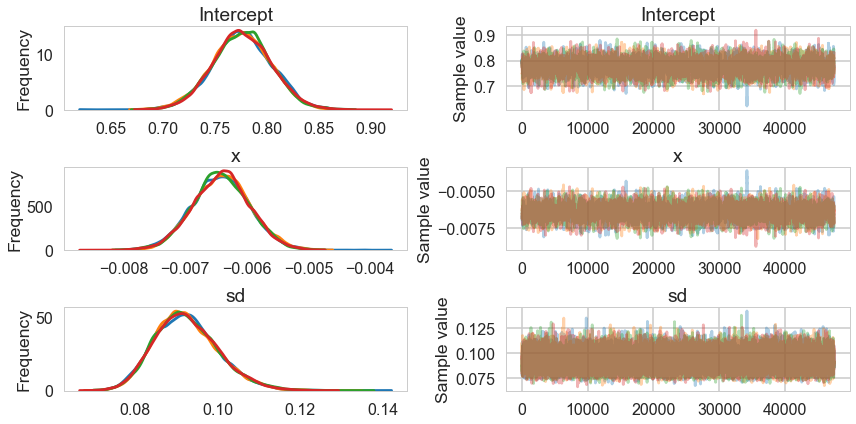

In [5]:
pm.traceplot(trace_linreg[2500:])
tr_linreg = trace_linreg[2500:]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024BE6507A90>,
      dtype=object)

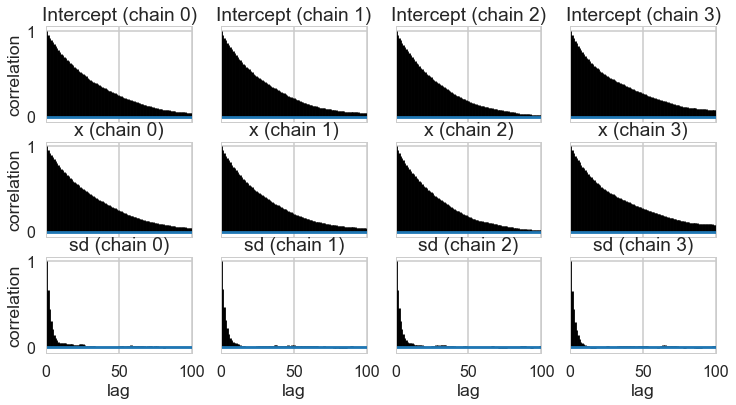

In [29]:
pm.autocorrplot(trace_linreg[10000:], varnames=['Intercept', 'x', 'sd'])

In [6]:
slope = trace_linreg['x'].mean()
intercept = trace_linreg['Intercept'].mean()
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', alpha=0.3)

100%|██████████████████████████████████████| 500/500 [00:00<00:00, 2836.42it/s]


-0.006417773446377201


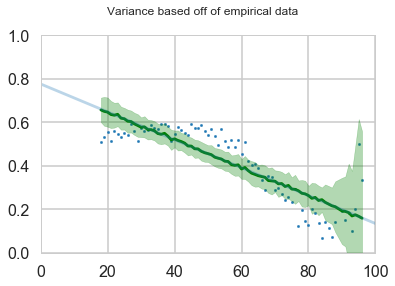

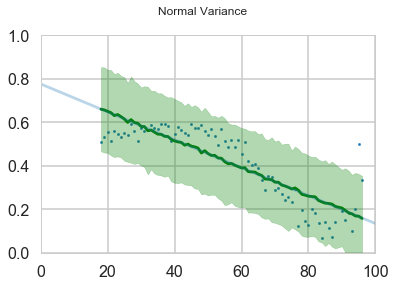

In [7]:
plt.figure(1)
plt.scatter(x, y, label='data', s=5)
plt.suptitle('Variance based off of empirical data')
plt.xlim(0,100);
plt.ylim(0,1);
#fpred = mgp.conditional("fpred", Xnew = x_pred.reshape(-1,1), pred_noise=False)
ppc = pm.sample_ppc(trace_linreg, samples=500, model=linreg)

yppc = ppc['y'].mean(axis=0)
yppcstd = st.beta.std(knowlgbtq+1, (numr-knowlgbtq)+1)
#var = st.beta((ppc['outcome'] == 1).sum(axis=0), (ppc['outcome'] == 0).sum(axis=0))
#plt.vlines(ppc['y'], *var.interval(0.95))
### plot posterior predictive
plt.plot(x, yppc, color="green")

### plot predictions for posterior predictive outside of ppc
abline(slope, intercept)
### plot variable variance
plt.fill_between(x, yppc - 2*yppcstd, yppc + 2*yppcstd, color='green', alpha=0.3)

plt.figure(2)
plt.scatter(x, y, label='data', s=5)
plt.suptitle('Normal Variance')
plt.xlim(0,100);
plt.ylim(0,1);
#fpred = mgp.conditional("fpred", Xnew = x_pred.reshape(-1,1), pred_noise=False)
ppc = pm.sample_ppc(trace_linreg, samples=500, model=linreg)

yppc = ppc['y'].mean(axis=0)
yppcstd = ppc['y'].std(axis=0)
#var = st.beta((ppc['outcome'] == 1).sum(axis=0), (ppc['outcome'] == 0).sum(axis=0))
#plt.vlines(ppc['y'], *var.interval(0.95))
### plot posterior predictive
plt.plot(x, yppc, color="green")

### plot predictions for posterior predictive outside of ppc
abline(slope, intercept)
plt.fill_between(x, yppc - 2*yppcstd, yppc + 2*yppcstd, color='green', alpha=0.3)
print(slope)

2). Using pymc3, create a 1-D Gaussian Process regression model with the same feature and dependent variables.  Use a squared exponential covariance function. Plot the mean predictions for ages 0-100, with a 2-sigma envelope.

For GP Regression, we can model the likelihood of knowing someone LGBTQ as a product of binomials -- one binomial distribution per age group. 

$$p(y_a | \theta_a, n_a) = Binom( y_a, n_a, \theta_a)$$

where $y_a$ (i.e. `knowlgbtq`) is the observed number of respondents who know someone lgbtq  at age $a$, $n_a$ (i.e. `numr`) is the number of trials and $\theta_a$ is the rate parameter for having an lgbtq acquaintance at age $a$.

Using the Gaussian approximation  (http://en.wikipedia.org/wiki/Binomial_distribution#Normal_approximation) to approximate the Binomial since `numr` is large, you can simply use a GP posterior with the error for each measurement to be given using this approximation. 

In [8]:
with pm.Model() as gp_fit:
    
    s2_n = pm.HalfCauchy('s2_n', beta=1)
    
    # covariance functions for the function f and the noise
    # uninformative prior on the function variance
    s2_f = pm.HalfCauchy('s2_f', beta=1)
    # priors on the covariance function hyperparameters
    l = pm.HalfCauchy('length', beta=1)
    f_cov = s2_f**2 * pm.gp.cov.ExpQuad(1, l)
    
    mgp = pm.gp.Marginal(cov_func=f_cov)
    y_obs = mgp.marginal_likelihood('y_obs', X=x.reshape(-1,1), y=y, noise=s2_n, is_observed=True)

In [9]:
with gp_fit:
    #step=pm.Metropolis()
    trace_gp = pm.sample(10000, tune=2000, nuts_kwargs={'target_accept':0.85})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Eddie\Anaconda2\envs\py36\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [length_log__, s2_f_log__, s2_n_log__]


In [10]:
with gp_fit:
    fpred = mgp.conditional("fpred", Xnew = x_pred.reshape(-1,1), pred_noise=True)
    ypred = mgp.conditional("ypred", Xnew = x_pred.reshape(-1,1), pred_noise=False)
    gp_samples = pm.sample_ppc(trace_gp, vars=[fpred, ypred], samples=200)

100%|████████████████████████████████████████| 200/200 [00:02<00:00, 69.39it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024BE68940B8>,
      dtype=object)

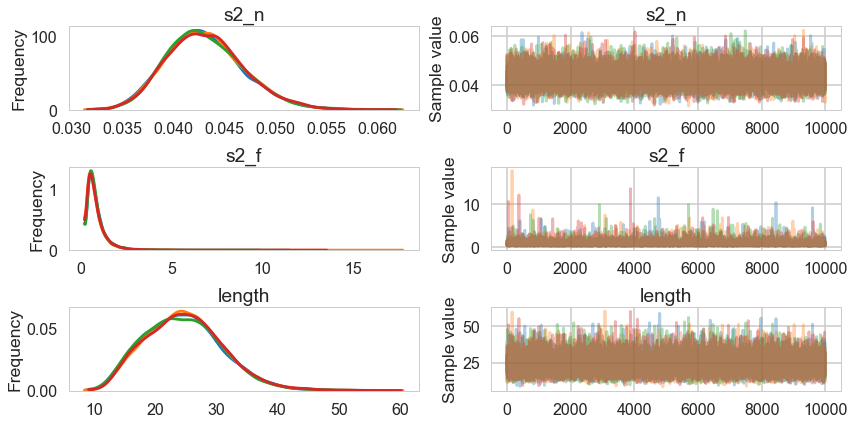

In [30]:
pm.traceplot(trace_gp)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024BE6D73D30>,
      dtype=object)

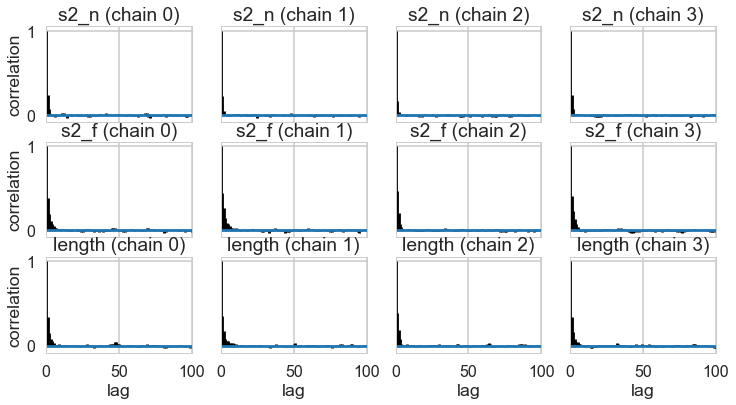

In [31]:
pm.autocorrplot(trace_gp)

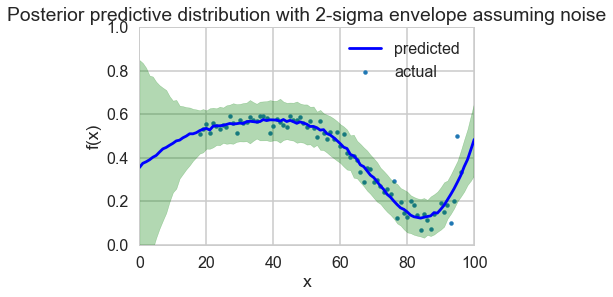

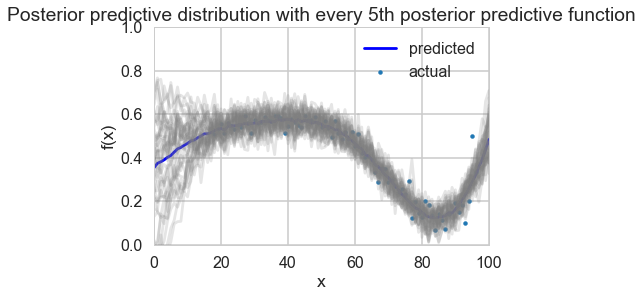

In [11]:
meanpred = gp_samples['fpred'].mean(axis=0)
yppc = gp_samples['ypred'].mean(axis=0)
yppcstd = gp_samples['fpred'].std(axis = 0)

#[plt.plot(x_pred, temp, color="gray", alpha=0.2) for temp in gp_samples['fpred'][::5,:]]
# overlay the observed data
plt.figure(3)
plt.scatter(x, y, s=15, label="actual");
plt.plot(x_pred, meanpred, 'b', ms=10, label="predicted");

### 2sigma envelope
plt.fill_between(x_pred, yppc - 2*yppcstd, yppc + 2*yppcstd, color='green', alpha=0.3)
plt.xlabel("x");
plt.ylabel("f(x)");
plt.title("Posterior predictive distribution with 2-sigma envelope assuming noise");
plt.xlim(0,100);
plt.ylim(0,1);
plt.legend();

plt.figure(4)
# overlay the observed data
plt.figure(1)
plt.scatter(x, y, s=15, label="actual");
plt.plot(x_pred, meanpred, 'b', ms=10, label="predicted");
[plt.plot(x_pred, temp, color="gray", alpha=0.2) for temp in gp_samples['fpred'][::5,:]]
plt.xlabel("x");
plt.ylabel("f(x)");
plt.title("Posterior predictive distribution with every 5th posterior predictive function");
plt.xlim(0,100);
plt.ylim(0,1);
plt.legend();

3). How do the models compare? Does age influence likelihood of acquaintance with someone LGBTQ? For Bayesian Linear Regression and GP Regression, how does age affect the variance of the estimates?

__Answer__: Age definitely influences the likelihood of acquaintance with someone LGBTQ. Judging from our models, the GP Regression seems to be more accurate (it would minimize squared sum loss more than the bayesian linear regression).

For Bayesian Linear Regression, in general as age increases, the likelihood of an acquaintance with someone LGBTQ decreases. However, at the lower end it's also worthwhile to note that the variance of that likelihood (according to the data collected) increases a lot. Since we're calculating the probability of knowing someone who is LGBTQ, the probability of each age having a certain likelihood of acquainatance can be interpreted as a Beta(number of LGBTQ + 1, number of non LGBTQ + 1) probability. This is the Bayesian Linear Regression variance according to the empirical data. However, if we look purely at our model, the variance is constant because that is what we used for our prior. The slope is -0.0064 per year, meaning that if we increase our age parameter by 1, we would expect to see a 0.0064 decrease in the decrease of the probability of an acquaintance with someone LGBTQ.

In general, it doesn't fit the data too well.

For GP Regression, the variance is relatively constant throughout the area where we have data. For areas without data, since we use a covariance matrix, we see the variance open up greatly (ages 0 to 18, ages 96 to 100). This fits the data much better and we see that from ages 20 to 40, the probability of knowing someone LGBTQ increases as you look at older people. However, from age 40 to 88, the likelihood decreases. At the end, it increases again. Although this model is indeed better fit, it may be slightly overfit because of the huge increase as the age variable approaches to 100 especially due to the one outlying datapoint (also notice it only had 2 samples/responses at that point). 

In general, it fits the data much better for the well-sampled part but it may be overfit for the parts where there's not much data collected.

## Problem 3:  Like a Punch to the Kidneys 

In this problem we will work with the US Kidney Cancer Dataset (by county), a dataset of kidney cancer frequencies across the US over 5 years on a per county basis. 

The kidney cancer data can be found [here](./kcancer.csv).

A casual inspection of the data might suggest that we independently model cancer rates for each of the provided counties.  Our experience in past homeworks/labs/lectures (in particular when we delved into the Rat Tumors problem) suggests potential drawbacks of conclusions based on raw cancer rates.  Addressing these drawbacks, let's look use a Bayesian model for our analysis of the data. In particular you will implement an Empircal Bayes model to examine the adjusted cancer rates per county.

Let $N$ be the number of counties; let $y_j$ the number of kidney cancer case for the $j$-th county, $n_j$ the population of the $j$-th county and $\theta_j$ the underlying kidney cancer rate for that county. We can construct a Bayesian model for our data as follows:
\begin{aligned}
y_j &\sim Poisson(5 \cdot n_j \cdot \theta_j), \quad j = 1, \ldots, N\\
\theta_j &\sim Gamma(\alpha, \beta), \quad j = 1, \ldots, N
\end{aligned}
where $\alpha, \beta$ are hyper-parameters of the model.

- (#1) Implement Empirical Bayes via moment matching as described as follows. Consider the **prior-predictive** distribution (also called the evidence i.e. the denominator normalization in bayes theorem) of the model: $p(y) = \int p(y \vert \theta) p(\theta) d \theta$. Why the prior-predictive? Because technically we "haven't seen" individual county data yet.  For this model, the prior-predictive is a negative binomial. Matching the mean and the variance of the negative binomial to that from the data, you can find appropriate expressions for $\alpha$ and $\beta$. (Hint: You need to be careful with the $5n_j$ multiplier.) 

- (#2) Produce a scatter plot of the raw cancer rates (pct mortality) vs the county population size. Highlight the top 300 raw cancer rates in red. Highlight the bottom 300 raw cancer rates in blue. Finally, on the same plot add a scatter plot visualization of the posterior mean cancer rate estimates (pct mortality) vs the county population size, highlight these in green.

- (#3) Using the above scatter plot, explain why using the posterior means from our model to estimate cancer rates is preferable to studying the raw rates themselves.

(**Hint:** You might also find it helpful to follow the Rat Tumor example.)

(**Note:** Up until now we've had primarily thought about the posterior predictive: $\int p( y \vert \theta) p(\theta \vert D) d\theta$.  The posterior predictive and the prior predictive can be somewhat connected. In conjugate models such as ours, the two distributions have the same form.) 

## Problem 4: In the Blink of a Bayesian Iris

We've done classification before, but the goal of this problem is to introduce you to the idea of classification using Bayesian inference. 

Consider the famous *Fisher flower Iris data set* a  multivariate data set introduced by Sir Ronald Fisher (1936) as an example of discriminant analysis. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, you will build a model to predict the species. 

For this problem only consider two classes: **virginica** and **not-virginica**. 

The iris data can be obtained [here](./iris.csv).

Let $(X, Y )$ be our dataset, where $X=\{\vec{x}_1, \ldots \vec{x}_n\}$ and $\vec{x}_i$ is the standard feature vector corresponding to an offset 1 and the four components explained above. $Y \in \{0,1\}$ are the scalar labels of a class. In other words the species labels are your $Y$ data (virginica = 0 and virginica=1), and the four features -- petal length, petal width, sepal length and sepal width -- along with the offset make up your $X$ data. 

The goal is to train a classifier, that will predict an unknown class label $\hat{y}$ from a new data point $x$. 

Consider the following glm (logistic model) for the probability of a class:

$$ p(y) = \frac{1}{1+e^{-x^T \beta}} $$

(or $logit(p) = x^T \beta$ in more traditional glm form)

where $\beta$ is a 5D parameter to learn. 

Then given $p$ at a particular data point $x$, we can use a bernoulli likelihood to get 1's and 0's. This should be enough for you to set up your model in pymc3. (Other Hints: also use theano.tensor.exp when you define the inverse logit to go from $\beta$ to $p$, and you might want to set up $p$ as a deterministic explicitly so that pymc3 does the work of giving you the trace).

Use a 60-40 stratified (preserving class membership) split of the dataset into a training set and a test set. (Feel free to take advantage of scikit-learn's `train_test_split`).

In [19]:
from sklearn.model_selection import train_test_split
import pandas as pd
import theano.tensor as t

### load data
data = pd.read_csv("iris.csv")

data.loc[data['class'].isin([' Iris-setosa', ' Iris-versicolor']), 'class'] = 0
data.loc[data['class'].isin([' Iris-virginica']), 'class'] = 1
data.insert(0, 'offset', 1)

data = data.values

x = data[:,:5]
y = data[:,5]

### split data into train and test
train, test = train_test_split(data, test_size=0.6)

xtrain = train[:,:5]
ytrain = train[:,5]

xtest = test[:,:5]
ytest = test[:,5]

1). Choose a prior for $\beta \sim N(0, \sigma^2 I) $ and write down the formula for the normalized posterior $p(\beta| Y,X)$. Since we dont care about regularization here, just use the mostly uninformative value $\sigma = 10$.

__Answer__: 

Given:
$$ \mu =
\begin{bmatrix}
    0 & 0 & 0 & 0 & 0
\end{bmatrix}
$$

$$ \Sigma =
\begin{bmatrix}
    100 & 0 & 0 & 0 & 0 \\
    0 & 100 & 0 & 0 & 0 \\
    0 & 0 & 100 & 0 & 0 \\
    0 & 0 & 0 & 100 & 0 \\
    0 & 0 & 0 & 0 & 100
\end{bmatrix}
$$

$$p(\beta| Y,X) = \frac{p(Y,X | \beta) \cdot p(\beta)}{p(Y, X)}$$

$$p(\beta| Y,X) \propto p(Y,X | \beta) \cdot p(\beta)$$

$$p(\beta| Y,X) \propto \prod_{i=1}^n \text{Bernoulli$_i$} \cdot \text{Multivariate Normal}$$

$$p(\beta| Y,X) \propto  \prod_{i=1}^n \left( \left(\frac{1}{1 + e^{-x_i^T \cdot \beta}}\right)^{y_i} \left(1 - \frac{1}{1 + e^{-x_i^T \cdot \beta}}\right)^{1 - y_i} \right) \frac{e^{-0.5 (\beta - \mu)^{T}(\beta - \mu)\Sigma^{-1}}}{\sqrt{(2\pi)^5 |\Sigma|}}$$

In [20]:
with pm.Model() as q3model:
    
    ### choosing prior for beta
    sigma = 10
    beta = pm.MvNormal('beta', mu = np.zeros(5), cov = (sigma**2) * np.identity(5), shape=5)
    
    ### determinstic 
    ### transforming beta using inverse logit
    p = pm.Deterministic('p', pm.math.invlogit(t.dot(xtrain, beta)))
    
    ### posterior (likelihood of observations)
    Y_obs = pm.Bernoulli('Y_obs', p=p, observed=ytrain)

2). Find the MAP and mean estimate for the posterior on the training set.

In [21]:
with q3model:
    # obtain starting values via MAP
    MAP = pm.find_MAP(model=q3model)

logp = -20.046, ||grad|| = 0.090834: 100%|███| 48/48 [00:00<00:00, 1390.15it/s]


In [22]:
with q3model:    
    # instantiate sampler
    trace_q3model = pm.sample(5000, nuts_kwargs={'target_accept':0.85})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Eddie\Anaconda2\envs\py36\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


In [23]:
posterior_mean = trace_q3model['beta'].mean(axis=0)
posterior_std = trace_q3model['beta'].std(axis=0)
p_mean = trace_q3model['p'].mean(axis=0)
print("Posterior Mean =", posterior_mean)
print("Posterior SD =", posterior_std)
print("MAP =", MAP['beta'])

Posterior Mean = [-15.95247739  -4.5166841   -2.15107539   5.08901247  14.49378793]
Posterior SD = [6.80910746 2.97448187 2.96169695 3.34289091 5.45903399]
MAP = [-12.70181719  -3.06802076  -1.55852237   3.30757007  11.50667243]


3). Implement a  sampler to sample from this posterior of $\beta$.   Generate samples of $\beta$ and plot the sequence of $\beta$'s  and histograms for each $\beta$ component.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024BD7E4F438>,
      dtype=object)

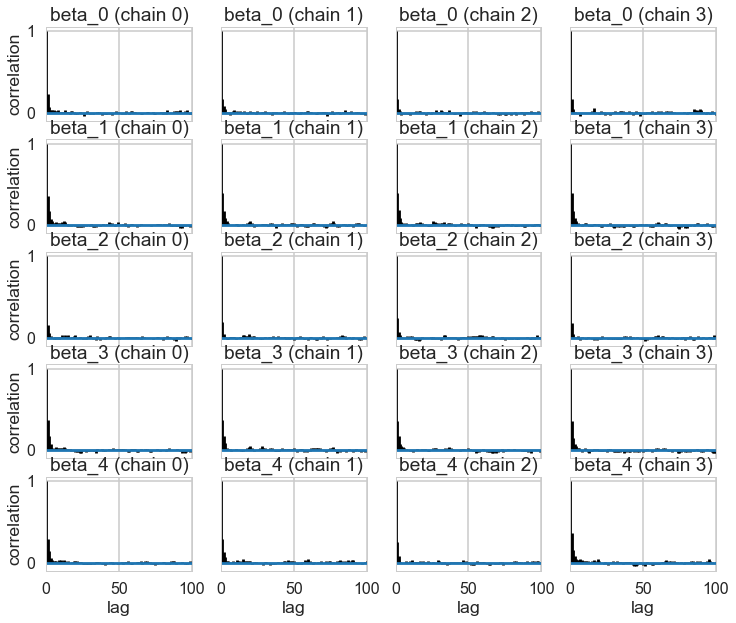

In [24]:
pm.autocorrplot(trace_q3model, varnames=['beta'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024BDE863160>,
      dtype=object)

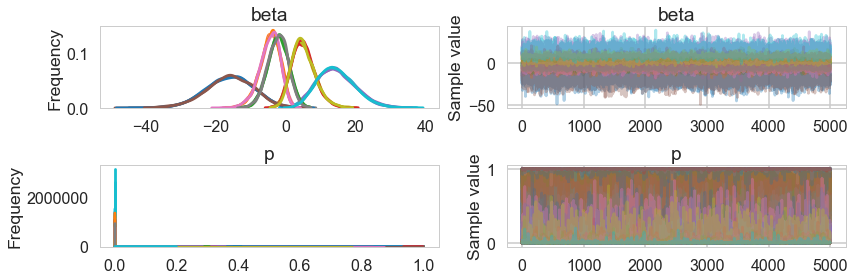

In [25]:
pm.traceplot(trace_q3model)